In [2]:
# Plotting libraries
from matplotlib.pyplot import plot as plt
from matplotlib.pyplot import figure as fig# For basic plots and figures
import matplotlib.ticker as mtick  # For formatting axes in matplotlib
import seaborn as sns  # For advanced statistical plotting

# Data handling
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from numpy import math  # math functions from NumPy (use standard math instead usually)

# Date and time
from datetime import datetime  # For handling date and time

# Plotly (interactive visualizations)
import plotly.graph_objects as go  # Low-level plotting
import plotly.express as px  # High-level, simple interface for Plotly
from plotly.subplots import make_subplots  # For subplot creation
from plotly.offline import init_notebook_mode, iplot  # For offline mode in Jupyter
import plotly.offline as po
import plotly.io as pio  # Plotly input/output operations

# Text and data preprocessing
from collections import Counter  # Count frequency of elements
from sklearn import preprocessing  # Preprocessing tools like label encoding, scaling
from sklearn.feature_extraction.text import TfidfVectorizer  # For transforming text to TF-IDF features

# Model selection (NOTE: you had a typo here!)
from sklearn.model_selection import train_test_split, KFold  # Corrected "model_selction" to "model_selection"

# Dimensionality reduction
from sklearn.decomposition import PCA  # Principal Component Analysis

# NLP
from nltk.corpus import stopwords  # You had a typo here
from nltk.stem import SnowballStemmer  # Corrected "SnowballSteammer"



C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\3109086315.py:10: DeprecationWarning:

`np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`



# step 1 Data Loading

In [3]:
stream_net = pd.read_csv("netflix_titles.csv")
stream_net.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
stream_net.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
stream_net.description

0       As her father nears the end of his life, filmm...
1       After crossing paths at a party, a Cape Town t...
2       To protect his family from a powerful drug lor...
3       Feuds, flirtations and toilet talk go down amo...
4       In a city of coaching centers known to train I...
                              ...                        
8802    A political cartoonist, a crime reporter and a...
8803    While living alone in a spooky town, a young g...
8804    Looking to survive in a world taken over by zo...
8805    Dragged from civilian life, a former superhero...
8806    A scrappy but poor boy worms his way into a ty...
Name: description, Length: 8807, dtype: object

In [6]:
stream_net.describe

<bound method NDFrame.describe of      show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail M

# step 2 preproccessing 


In [7]:
stream_net.isnull().count()

show_id         8807
type            8807
title           8807
director        8807
cast            8807
country         8807
date_added      8807
release_year    8807
rating          8807
duration        8807
listed_in       8807
description     8807
dtype: int64

In [8]:
stream_net.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
stream_net.index

RangeIndex(start=0, stop=8807, step=1)

In [10]:
stream_net.shape

(8807, 12)

In [11]:
stream_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [12]:
# Checking Duplic

stream_net.duplicated().sum()

0

In [13]:
#Missing Valuees Count
stream_net.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [14]:
#total null value 

stream_net.isna().sum().sum()

4307

# Chart 1

C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\1273682132.py:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




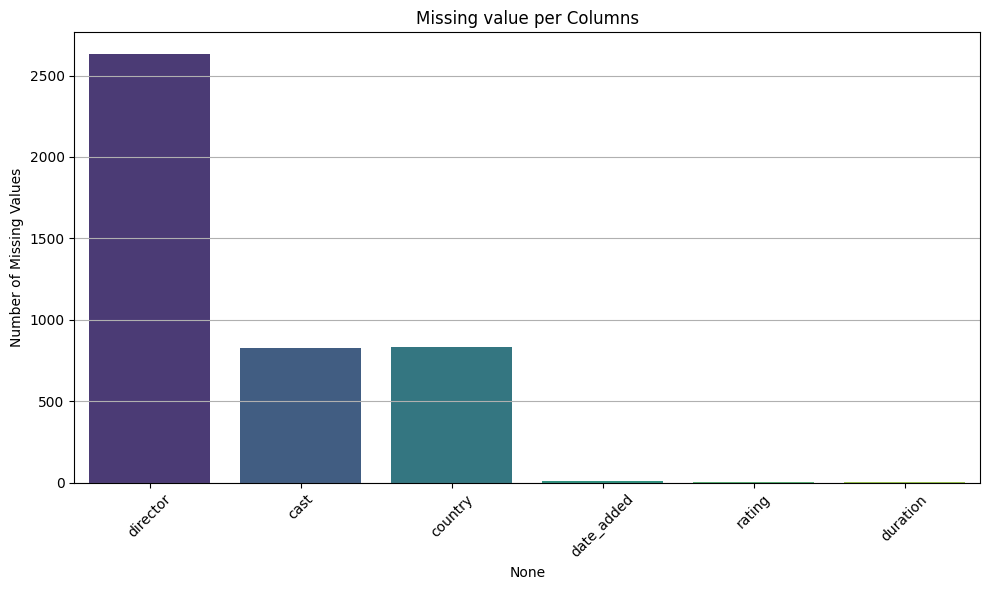

In [15]:
# Visializing the missing value
missing = stream_net.isnull().sum()
missing = missing[missing>0]

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x =missing.index,y =missing.values,palette ="viridis")
plt.title("Missing value per Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [16]:
#Handling those missing values
stream_net['director'].fillna(value="Not Found director", inplace=True)

# Use mode of existing column, not a typo column name
stream_net['cast'].fillna(value=stream_net['cast'].mode()[0], inplace=True)

stream_net['country'].fillna(value=stream_net['country'].mode()[0], inplace=True)

# Fix typo: it's likely 'date_added' not 'data_added' or anything else
stream_net['date_added'].fillna(value=stream_net['date_added'].mode()[0], inplace=True)

stream_net['rating'].fillna(value="Not Found rating", inplace=True)

stream_net['duration'].fillna(value="Not Found duration", inplace=True)

# MODE : categorical data with a dominant/common value (like country, rating, genre)
# MEDIAN : : numerical data (e.g., age, salary)
# MEAN l numerical data with a normal distribution (not many outliers)

C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\3738127781.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\3738127781.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [17]:
stream_net.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [18]:
stream_net.shape

(8807, 12)

# Chart 2

# step 3 Vizualiaztion

In [19]:
# there are two type in dataset 1. TV shows ,2. Movies

labels = stream_net['type'].value_counts().index
values = stream_net['type'].value_counts().values

# Step 2: Create donut chart hole=0.6 makes it a donut chart
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.6)])


fig.update_layout(
    title_text='Type of Content Watched on Netflix',
    title_x=0.5,
    height=500,
    width=500,
    legend=dict(x=0.9),
    annotations=[
        dict(
            text='Type of Content',
            font_size=20,
            showarrow=False
        )
    ]
)


colors = ["#00bbff","#ff7300"]
fig.update_traces(marker =dict(colors = colors))

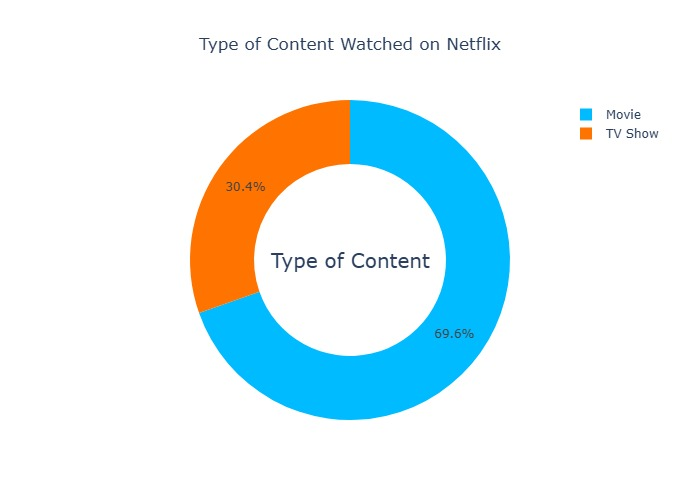

In [20]:
# this code is for jpeg
from IPython.display import Image
img_bytes = fig.to_image(format = "jpeg")
Image(img_bytes)

# Chart 3

In [21]:
# Bar Chart (Number of Movies vs TV Shows)


import plotly.express as px

type_counts = stream_net['type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

fig_bar = px.bar(type_counts,
                x='Type',
                y='Count',
                color='Type',
                title='Count of TV Shows vs Movies on Netflix',
                text='Count',
                color_discrete_sequence=["#00bbff", "#ff7300"])

fig_bar.update_layout(title_x=0.5)
fig_bar.show()


# Chart 4

In [22]:
#  Line Chart (Content Trend Over the Years)
content_by_year = stream_net.groupby(['release_year', 'type'])['show_id'].count().reset_index()
content_by_year.columns = ['Year', 'Type', 'Count']

fig_line = px.line(content_by_year,
                   x='Year',
                   y='Count',
                   color='Type',
                   markers=True,
                   title='TV Shows and Movies Released Over the Years',
                   color_discrete_sequence=["#00bbff", "#ff7300"])

fig_line.update_layout(title_x=0.5)
fig_line.show()


In [23]:
stream_net["cast"]

0                                      David Attenborough
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                      David Attenborough
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                   David Attenborough
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [24]:
# Seperating actors from cast cloumn

cast = stream_net['cast'].str.split(',', expand = True).stack()
# Top actors name who play highest role in movies/show
cast.value_counts()

David Attenborough        845
 Anupam Kher               39
 Rupa Bhimani              31
 Takahiro Sakurai          30
 Julie Tejwani             28
                         ... 
 Vedika                     1
 Tedros Teclebrhan          1
 Maryam Zaree               1
 Melanie Straub             1
 Chittaranjan Tripathy      1
Name: count, Length: 39296, dtype: int64

# Chart 5

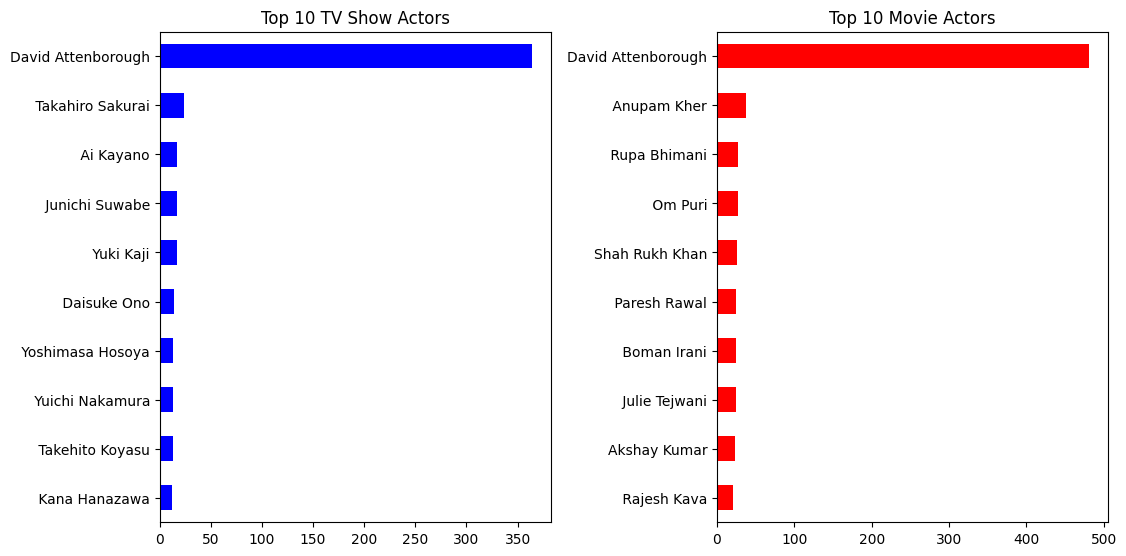

In [25]:


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
# Top actors name who play highest role in movies
top_movie_actor = stream_net[stream_net['type'] == "Movie"]['cast'].str.split(',', expand = True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'No cast']

# Top actors name who play highest role in TV show

tv_casts = stream_net[stream_net['type'] == "TV Show"]['cast'].str.split(',', expand = True).stack()
tv_casts = tv_casts[tv_casts != 'No cast']

# ploting



# --- Plot TV Show actors ---
tv_casts.value_counts().head(10).plot(kind='barh', ax=ax[0], color='blue')
ax[0].set_title('Top 10 TV Show Actors', fontsize=12)
ax[0].invert_yaxis()

# --- Plot Movies actors ---
visl = top_movie_actor.value_counts().head(10).plot(kind = 'barh',ax=ax[1],color='red')
visl.set_title('Top 10 Movie Actors', fontsize=12)
visl.invert_yaxis()  # Highest value at the top

#layout formatting
plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

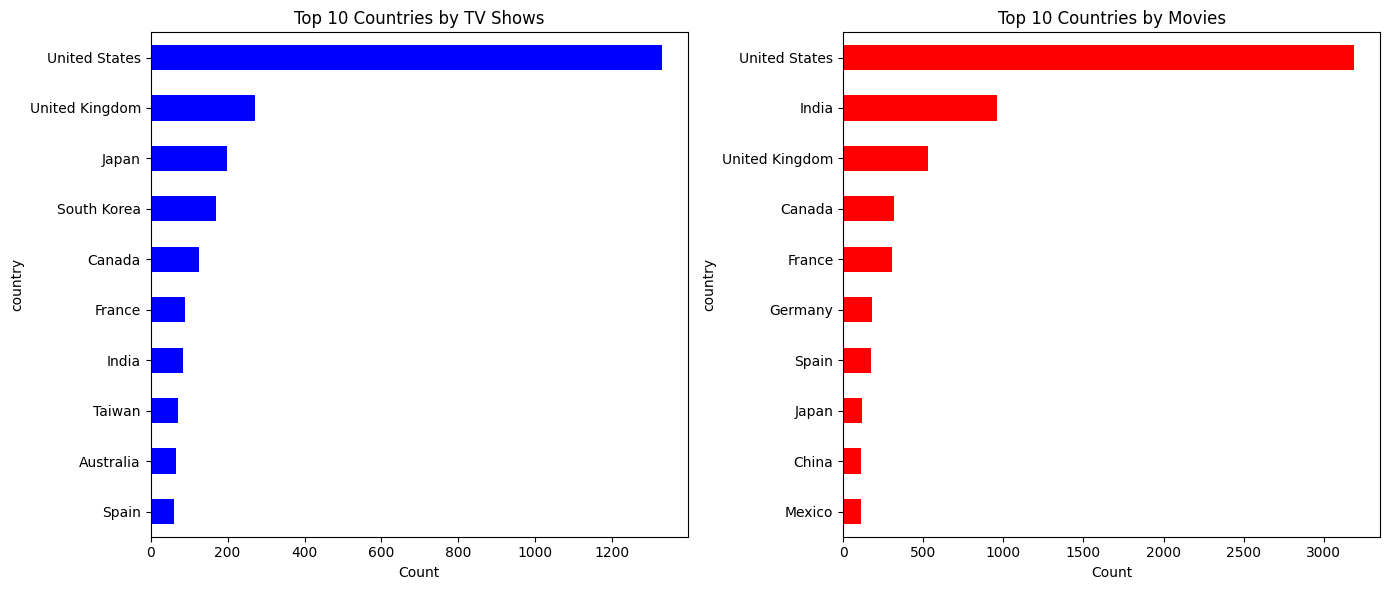

In [26]:
import matplotlib.pyplot as plt

# --- Clean data ---
country_data = stream_net[['country', 'type']].dropna()
country_data = country_data[country_data['country'] != '']  # Remove empty strings

# --- Handle multiple countries (split on ',') ---
country_data = country_data.assign(country=country_data['country'].str.split(', '))
country_data = country_data.explode('country').reset_index(drop=True)
country_data['country'] = country_data['country'].str.strip()

# --- Separate Movie and TV Show counts ---
movie_country_counts = country_data[country_data['type'] == 'Movie']['country'].value_counts().head(10)
tv_country_counts = country_data[country_data['type'] == 'TV Show']['country'].value_counts().head(10)

# --- Plotting side by side ---
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# TV Shows per country
tv_country_counts.plot(kind='barh', ax=ax[0], color='blue')
ax[0].set_title('Top 10 Countries by TV Shows', fontsize=12)
ax[0].set_xlabel('Count')
ax[0].invert_yaxis()

# Movies per country
movie_country_counts.plot(kind='barh', ax=ax[1], color='red')
ax[1].set_title('Top 10 Countries by Movies', fontsize=12)
ax[1].set_xlabel('Count')
ax[1].invert_yaxis()

plt.tight_layout()
plt.show()


# Chart 6


In [27]:
# Now Visualization of catorige of Show and movies

top_genre = stream_net['listed_in'].value_counts().head(10)

fig = px.pie(top_genre,values = top_genre.values,names=top_genre.index)
fig.show()



In [28]:
# now visualise the countries like how much each counrty make movies and tv show like above but indivial 

countries_vs_genre = stream_net[['country','listed_in']]

def countries_wise_genre(country):
    country_genre = countries_vs_genre[countries_vs_genre['country']==country]
    
    # next , the funtion join all the genre strings together into single long string using the ",".join()
    # Method and then splits the ling strin into a list of individual genre strings using the split() method ","
    country_genre = ",".join(country_genre['listed_in'].dropna()).split(",")
    country_genre_dict = dict(Counter(country_genre))
    return country_genre_dict

countries_vs_genre


,country,listed_in
0,United States,Documentaries
1,South Africa,"International TV Shows, TV Dramas, TV Mysteries"
2,United States,"Crime TV Shows, International TV Shows, TV Act..."
3,United States,"Docuseries, Reality TV"
4,India,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,United States,"Cult Movies, Dramas, Thrillers"
8803,United States,"Kids' TV, Korean TV Shows, TV Comedies"
8804,United States,"Comedies, Horror Movies"
8805,United States,"Children & Family Movies, Comedies"


In [ ]:
# def country_wise_genre(country_name):
#     genre_series = stream_net[
#         stream_net['country'].notna() &
#         stream_net['listed_in'].notna() &
#         stream_net['country'].str.contains(country_name)
#     ]['listed_in']

#     genre_series = genre_series.str.split(', ')
#     genre_flat = genre_series.explode().str.strip()

#     return genre_flat.value_counts().head(5)



In [51]:

# Define list of top ten countries.
country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia']
# Create an empty dict to store values of each genre for each country.
country_wise_genre_dict = {}
# Iterate through all values in country_list.
for i in country_list:
  genre_data = country_wise_genre(i)
  country_wise_genre_dict[i] = genre_data
  country_genre_count_df = pd.DataFrame(country_wise_genre_dict).reset_index()
  country_genre_count_df.columns = ['Genre'] + list(country_genre_count_df.columns[1:])

  
country_genre_count_df


,Genre,United States,India,United Kingdom,Canada,Japan,France,South Korea,Spain,Mexico,Australia
0,Action & Adventure,446.0,137.0,NaN,NaN,57.0,NaN,NaN,NaN,NaN,NaN
1,Anime Features,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN
2,Anime Series,NaN,NaN,NaN,NaN,143.0,NaN,NaN,NaN,NaN,NaN
3,British TV Shows,NaN,NaN,225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Children & Family Movies,496.0,NaN,NaN,80.0,NaN,NaN,NaN,NaN,NaN,19.0
5,Comedies,774.0,323.0,NaN,94.0,NaN,51.0,NaN,47.0,NaN,NaN
6,Crime TV Shows,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN
7,Documentaries,587.0,NaN,128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Dramas,945.0,662.0,197.0,82.0,NaN,167.0,NaN,76.0,44.0,38.0
9,Independent Movies,NaN,167.0,NaN,NaN,NaN,73.0,NaN,NaN,NaN,NaN


In [52]:
stream_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8807 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8807 non-null   object
 9   duration      8807 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [53]:
# Plot the above data.
df = country_genre_count_df

# Define colours to be used.
colors = ['aliceblue', 'brown', 'crimson', 'cyan', 'darkblue', 'darkmagenta', 'darkolivegreen', 'darkorange', 'darkturquoise', 'darkviolet', 'deeppink', 'forestgreen',
          'fuchsia', 'gainsboro', 'goldenrod', 'gray','maroon', 'mediumaquamarine', 'mediumvioletred', 'midnightblue', 'orchid', 'palegoldenrod', 'palegreen', 'paleturquoise',
          'plum', 'powderblue', 'purple', 'red', 'rosybrown', 'royalblue', 'saddlebrown', 'salmon', 'sandybrown','seagreen', 'seashell', 'sienna', 'silver', 'slategray', 'snow',
          'springgreen', 'tomato','yellow', 'yellowgreen', 'darkred', 'lavender', 'lightcoral', 'navy', 'olive', 'teal', 'turquoise']


# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=5, specs=specs, subplot_titles=['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico', 'Australia'])

# Define traces.
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United States'], name='United States'),1,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['India'],  name='India'),1,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['United Kingdom'],  name='United Kingdom'),1,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Canada'],  name='Canada'),1,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Japan'],  name='Japan'),1,5)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['France'],  name='France'),2,1)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['South Korea'],  name='South Korea'),2,2)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Spain'],  name='Spain'),2,3)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Mexico'],  name='Mexico'),2,4)
fig.add_trace(go.Pie(labels=df['Genre'], values=df['Australia'],  name='Australia'),2,5)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='none', marker=dict(colors=colors))
fig.update_layout(title={'text': 'Top ten countries and the content they provide.',
                          'y':0.97,
                          'x':0.5,
                          'font_size':25,
                          'xanchor': 'center',
                          'yanchor': 'top'},height=650, width=1550,paper_bgcolor='white',
                  legend=dict(x=0.099,orientation="h")
                          )
fig = go.Figure(fig)
# fig.show()
fig.show()

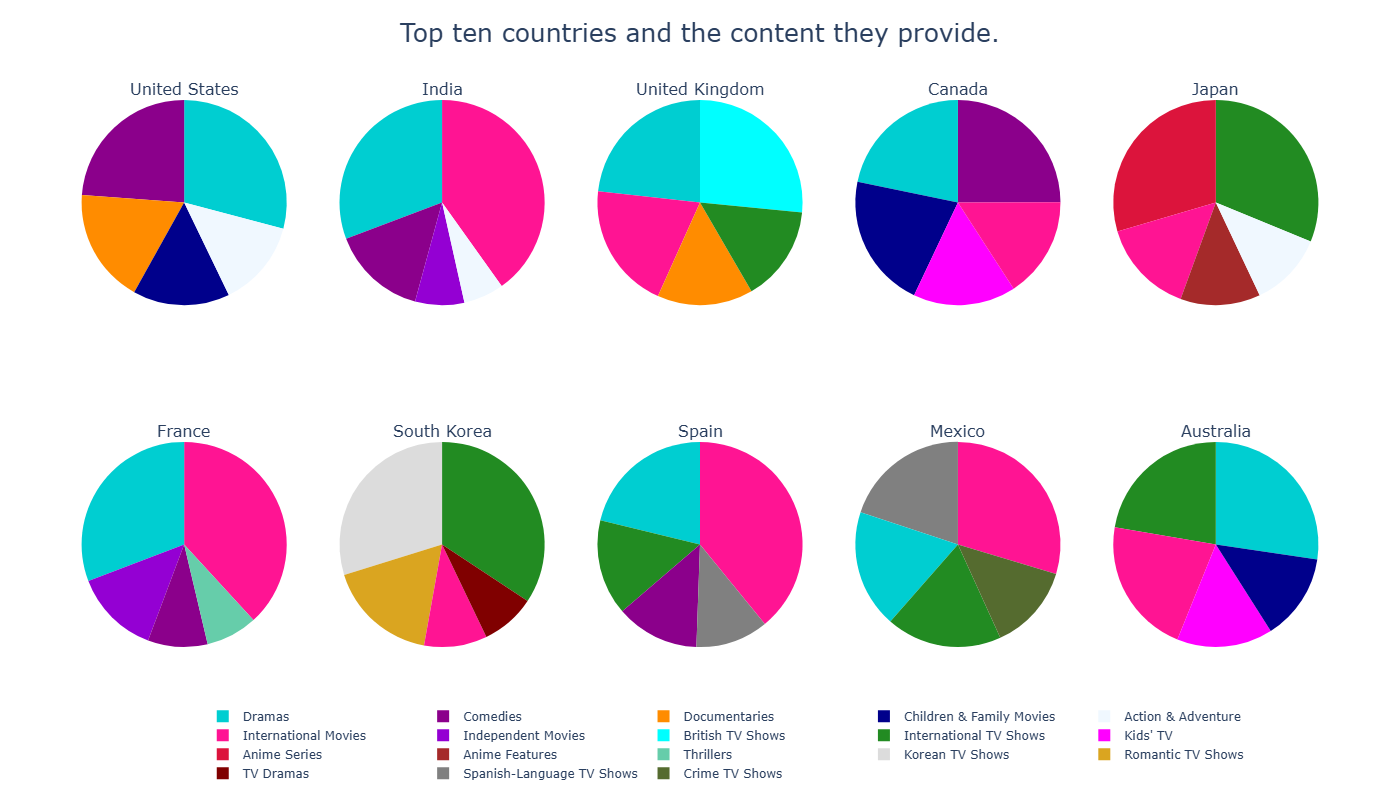

In [54]:


from IPython.display import Image
img_bytes = fig.to_image(format="png", width=1400, height=800, scale=1)
Image(img_bytes)

In [55]:
# Chart - 10 visualization code
# number of unique values
stream_net['release_year'].nunique()

74

In [56]:

print(f'Oldest release year : {stream_net.release_year.min()}')
print(f'Latest release year : {stream_net.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\1327752007.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




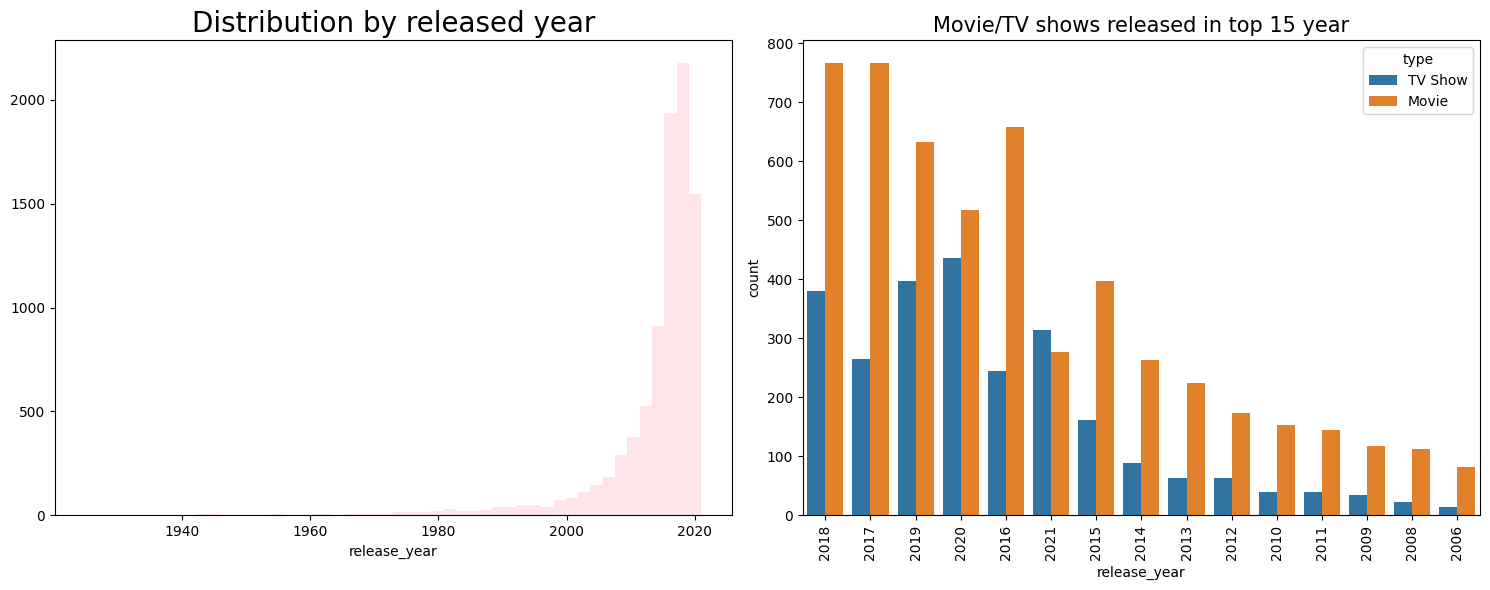

In [58]:

fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.distplot(stream_net['release_year'], ax=ax[0], kde=False,color='pink')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=stream_net, order=stream_net['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [59]:

# Chart - 11 visualization code
#Ratings
# number of unique values
stream_net.rating.nunique()

18

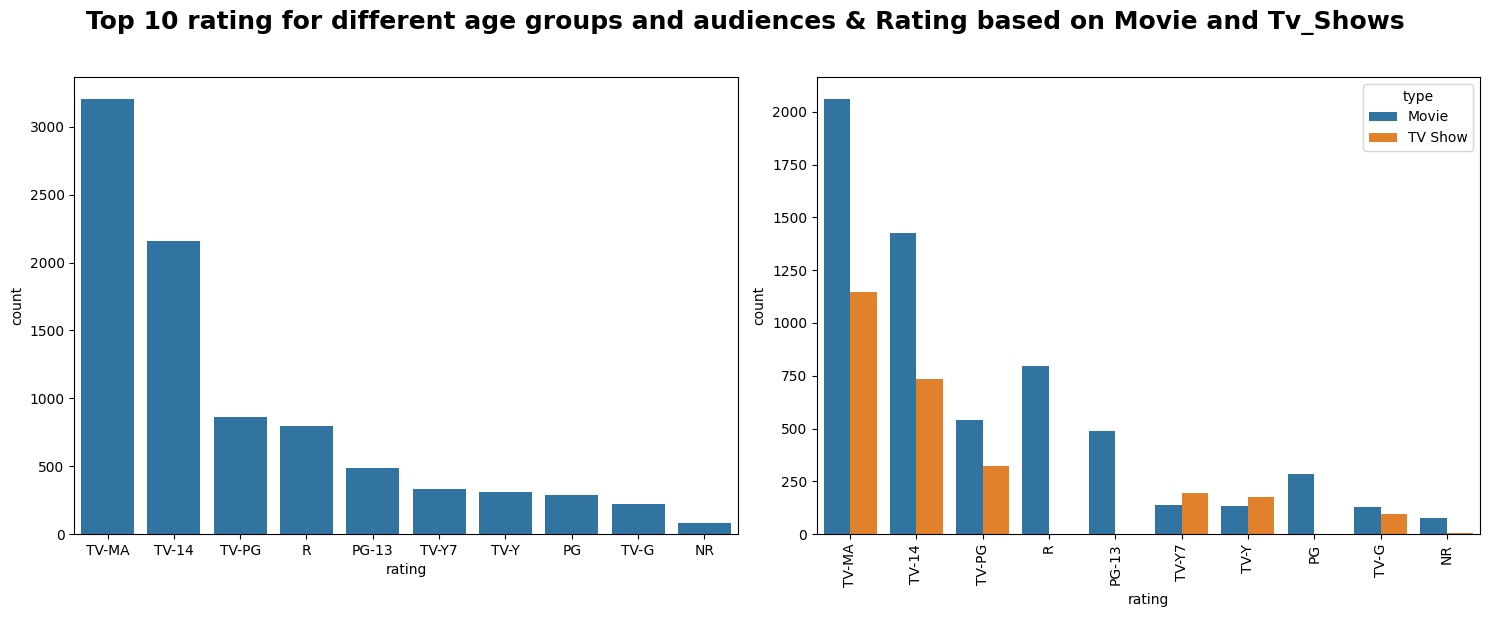

In [60]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
sns.countplot(x="rating", data=stream_net, order=stream_net['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=stream_net, hue='type', order=stream_net['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()
     

In [61]:
# Import folium library for creating interactive maps
import folium

# Chart - 12 visualization code

# Create a folium map centered roughly at [20, 0] with zoom level 2
# 'OpenStreetMap' is the default tile; 'stamenterrain' caused an error earlier due to missing attribution
fig = folium.Map(location=[20, 0], zoom_start=2)

# Define a dictionary with:
# - Country names as keys
# - Each country has:
#     - 'coords': latitude and longitude to position the marker on the map
#     - 'color': a color to visually distinguish the country on the map
countries = {
    'United States': {'coords': [37.0902, -95.7129], 'color': 'red'},
    'India': {'coords': [20.5937, 78.9629], 'color': 'green'},
    'United Kingdom': {'coords': [55.3781, -3.4360], 'color': 'blue'},
    'Canada': {'coords': [56.1304, -106.3468], 'color': 'orange'},
    'Japan': {'coords': [36.2048, 138.2529], 'color': 'purple'},
    'France': {'coords': [46.2276, 2.2137], 'color': 'pink'},
    'South Korea': {'coords': [35.9078, 127.7669], 'color': 'gray'},
    'Spain': {'coords': [40.4637, -3.7492], 'color': 'black'},
    'Mexico': {'coords': [23.6345, -102.5528], 'color': 'brown'}
}

# Loop over each country in the dictionary
for country, info in countries.items():
    # Add a marker to the map with:
    # - Location set to country coordinates
    # - Tooltip shown on hover (country name)
    # - Popup shown on click (with color info)
    # - Icon color set based on the specified country color
    folium.Marker(
        location=info['coords'],
        tooltip=country,
        popup=f"Color: {info['color']}",
        icon=folium.Icon(color=info['color'])
    ).add_to(fig)

# Show the interactive map (in Jupyter, this will render inline)
fig


C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\1976486755.py:38: UserWarning:

color argument of Icon should be one of: {'red', 'blue', 'black', 'lightred', 'darkpurple', 'orange', 'purple', 'lightgray', 'darkgreen', 'pink', 'lightblue', 'darkred', 'darkblue', 'lightgreen', 'beige', 'white', 'gray', 'green', 'cadetblue'}.



In [62]:
# Step 1: Replace NaN values in 'director' column with empty string
stream_net['director'] = stream_net['director'].fillna('')

# Step 2: Get value counts for top 15 directors
directors_list = stream_net['director'].value_counts().head(15).reset_index()

# Step 3: Rename the columns properly
directors_list.columns = ['Directors name', 'Count']  # Rename here directly, not using rename()

# Step 4: Create bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Step 5: Set custom colors using Seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Step 6: Add title and layout
fig.update_layout(
    title={
        'text': 'Top 15 directors with highest number of Movies and TV Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    autosize=False,
    width=1200,
    height=500
)

# Step 7: Show the plot
fig.show()


In [63]:
directors_list


,Directors name,Count
0,Not Found director,2634
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12


In [64]:
stream_net['listed_in'].value_counts().head(25)


listed_in
Dramas, International Movies                              362
Documentaries                                             359
Stand-Up Comedy                                           334
Comedies, Dramas, International Movies                    274
Dramas, Independent Movies, International Movies          252
Kids' TV                                                  220
Children & Family Movies                                  215
Children & Family Movies, Comedies                        201
Documentaries, International Movies                       186
Dramas, International Movies, Romantic Movies             180
Comedies, International Movies                            176
Comedies, International Movies, Romantic Movies           152
Dramas                                                    138
Dramas, International Movies, Thrillers                   134
Action & Adventure, Dramas, International Movies          132
Action & Adventure                                        12

In [65]:

import plotly.express as px
import pandas as pd

counts = stream_net['listed_in'].value_counts().head(10)
average = counts.mean()

df = pd.DataFrame({'Category': counts.index, 'Count': counts.values})
colors = px.colors.qualitative.Dark24[:10]
fig = px.bar(df, x='Category', y='Count', color='Category', color_discrete_sequence=colors)
fig.add_hline(y=average, line_color='red')
fig.update_layout(title='Top 10 Average Genere with Count',title_x=0.3)

fig.show()

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
stream_net['target_ages'] = stream_net['rating'].replace(ratings)

# verify mapping worked
print(stream_net['target_ages'].value_counts())

target_ages
Adults              4092
Teens               2650
Older Kids          1490
Kids                 568
Not Found rating       4
74 min                 1
84 min                 1
66 min                 1
Name: count, dtype: int64


In [81]:
# Add a count column
stream_net['count'] = 1  

# Top 10 countries by content count
top_countries = (stream_net.groupby('country')['count'].sum().sort_values(ascending=False).head(10).index)

# Filter dataset for only top 10 countries
df_heatmap = stream_net[stream_net['country'].isin(top_countries)]

# Create crosstab (country vs target age categories)
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'])

# Normalize row-wise to get proportions
df_heatmap = df_heatmap.div(df_heatmap.sum(axis=1), axis=0)

# Transpose for visualization (optional)
df_heatmap = df_heatmap.T


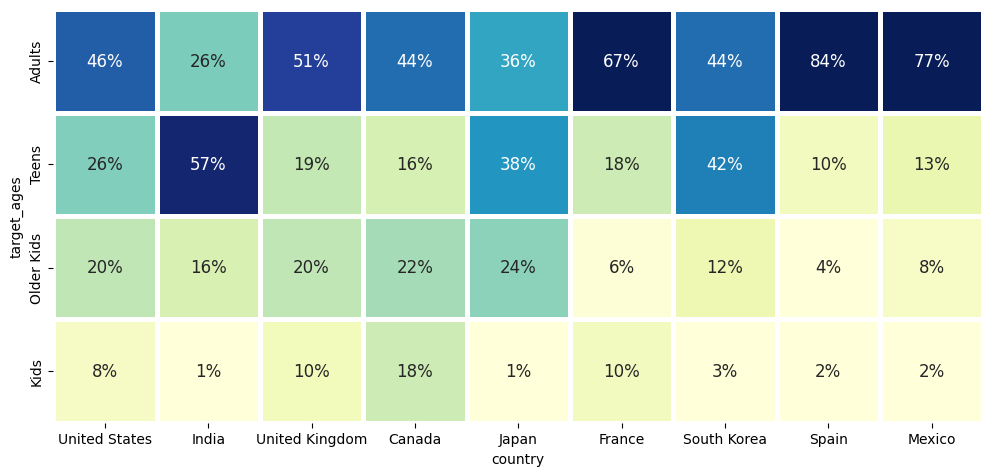

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


# Hypothesis

In [88]:

#making copy of df_clean_frame
stream_hypothesis=stream_net.copy()
#head of df_hypothesis
stream_hypothesis.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Teens,1
1,s2,TV Show,Blood & Water,Not Found director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Adults,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Adults,1
3,s4,TV Show,Jailbirds New Orleans,Not Found director,David Attenborough,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Adults,1
4,s5,TV Show,Kota Factory,Not Found director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Adults,1


In [89]:
#filtering movies from tv Show columns

stream_hypothesis =stream_hypothesis[stream_hypothesis["type"]=="Movie"]

In [90]:
#with respect to each ratings assigning it into group of categories                 
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

stream_hypothesis['target_ages'] = stream_hypothesis['rating'].replace(ratings_ages)
#let's see unique target ages 
stream_hypothesis['target_ages'].unique()

array(['Teens', 'Older Kids', 'Adults', 'Kids', '74 min', '84 min',
       '66 min', 'Not Found rating'], dtype=object)

In [91]:

stream_hypothesis['target_ages'] = pd.Categorical(stream_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

stream_hypothesis['duration'] = stream_hypothesis['duration'].astype(str)  # Convert to string type
stream_hypothesis['duration'] = stream_hypothesis['duration'].str.extract('(\d+)')
stream_hypothesis['duration'] = pd.to_numeric(stream_hypothesis['duration'])

stream_hypothesis.head(3)

<>:4: SyntaxWarning:

invalid escape sequence '\d'

<>:4: SyntaxWarning:

invalid escape sequence '\d'

C:\Users\samiwadho\AppData\Local\Temp\ipykernel_17304\804424867.py:4: SyntaxWarning:

invalid escape sequence '\d'



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,target_ages,count
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,David Attenborough,United States,"September 25, 2021",2020,PG-13,90.0,Documentaries,"As her father nears the end of his life, filmm...",Teens,1
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",United States,"September 24, 2021",2021,PG,91.0,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,Older Kids,1
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125.0,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",Adults,1
